# Exploratory analysis

The data used for the project can be found on [Kaggle](https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction), and as said in the [introduction](https://github.com/FelixLuciano/Fake-JobPosting-Prediction#readme), the data we chose is about job interviews that are fraudulent or not. It was necessary to make a lot of adaptations and optimization to the dataset due to the large number of lines in the database, and alter the datas that are not relevant for our analysis.

**Pandas** allows us to transform our dataset into a dataframe, which transforms the data into a structure of 2 dimensions, rows and columns, below we can visualize the data in the form of a table. Also, **matplotlib** allows us to create graphs to visualize this data in the form of maps, histograms or charts.

In [1]:
# pandas - pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
import pandas as pd

# matplotlib - A comprehensive library for creating static, animated, and interactive visualizations
import matplotlib.pyplot as plt

## 1. Load Dataset

In [2]:
# Dataset file path
path = "../src/dataset/fake_job_postings.csv"

# Index column name
index_column = "job_id"

# Load dataset into a DataFrame
df = pd.read_csv(path, index_col=index_column)

## 2. Exploration and Preparation of the Dataset


In [3]:
list(df.columns)

['title',
 'location',
 'department',
 'salary_range',
 'company_profile',
 'description',
 'requirements',
 'benefits',
 'telecommuting',
 'has_company_logo',
 'has_questions',
 'employment_type',
 'required_experience',
 'required_education',
 'industry',
 'function',
 'fraudulent']

In [4]:
df.shape

(17880, 17)

Our dataset contains 17,880 rows and 18 columns. Below is a description of each column in this dataset with the original names and what they contain, which was taken from the author of the dataset:

- **job_id** - Unique Job ID
- **title** - The title of the job ad entry.
- **location** - Geographical location of the job ad.
- **department** - Corporate department (e.g. sales).
- **salary_range** - Indicative salary range (e.g. \$50,000-\$60,000)
- **company_profile** - A brief company description.
- **description** - The details description of the job ad.
- **requirements** - Enlisted requirements for the job opening.
- **benefits** - Enlisted offered benefits by the employer.
- **telecommuting** - True for telecommuting positions.
- **has_company_logo** - True if company logo is present.
- **has_questions** - True if screening questions are present.
- **employment_type** - Full-type, Part-time, Contract, etc.
- **required_experience** - Executive, Entry level, Intern, etc.
- **required_education** - Doctorate, Master’s Degree, Bachelor, etc.
- **industry** - Automotive, IT, Health care, Real estate, etc.
- **function** - Consulting, Engineering, Research, Sales etc.
- **fraudulent** - Classification attribute.

Then we can define two types of variables

- **Feature**: These are the variables that will be used as input by the predictive model;
- **Target**: It is the variable we want to predict with the model.

We assumed that two variables, `location` and `salary range`, were not relevant for the prediction. In the case of `location`, the information contained made the model biased when predicting fraud, since in the dataset a large part of the frauds were located in the same place. For `salary range`, the payments were described in different currencies, for example some in dollars others in reais, this difference is irrelevant and may cause difficulties in the predictions.

### 3. Transformations and cleaning

Based on the descriptions of each column and the variables of interest, we can make transformations and cleanings that will help us to better visualize our data.

In [5]:
categories = {   "telecommuting": ["no", "yes"],
    "has_company_logo": ["no", "yes"],
    "has_questions": ["no", "yes"],
    "fraudulent": ["no", "yes"]
}

for column, column_categories in categories.items():
    df[column] = df[column].astype("category")
    df[column].cat.categories = column_categories

del df["location"]
del df["salary_range"]


### 3.1. Fill empty values

It is common in large data sets to have null or unfilled values. This can occur due to filling errors, the lack of information, or for any other reason. How to handle null values depends on the purpose of data analysis. In some cases it is possible to ignore them if this absence does not negatively affect the analysis, in others it is necessary to exclude every row that has a null value. It is even possible to fill null values with a specific value.

We will analyze the null values of each column and create a strategy to deal with each null value.


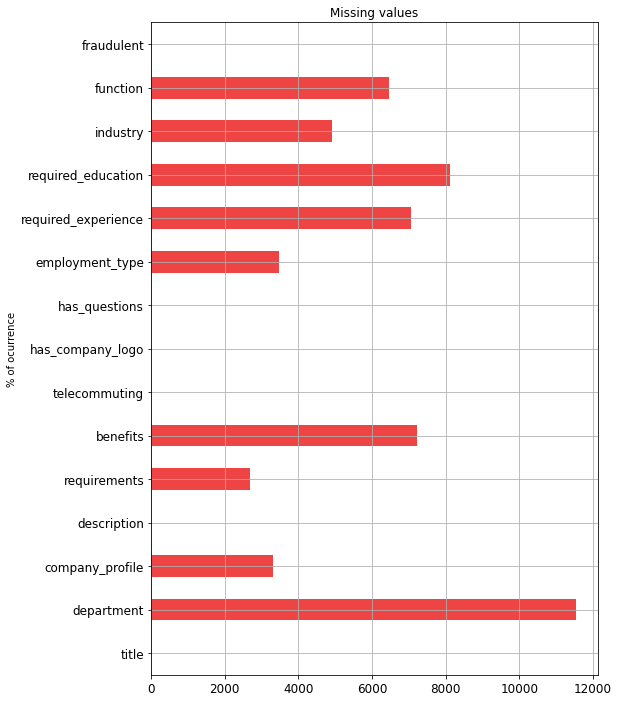

In [6]:
# Calculate the amount of missing values in each column
missing_counts = df.isnull().sum()

# Plot a horizontal bar graph with the obtained values
plt.figure(figsize=(8, 12))
missing_counts.plot(title="Missing values", kind="barh", color="#E44", grid=True, fontsize="12")
plt.ylabel("% of ocurrence")
plt.rcParams["font.size"] = "12"
plt.savefig("plots/missing_values.png", dpi=300)
plt.show()

Due to the characteristics of this project, all columns with null values can be filled with an specific value. In this case, the value will be "Missing", which will serve as just another category in the columns of interest.

In [7]:
for column_name in df.columns:
    column = df[column_name]

    if not str(column.dtype) == "category":
        df[column_name] = df[column_name].fillna("Missing")


## 4. DataFrame

In [8]:
df

,title,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
job_id,,,,,,,,,,,,,,,
1,Marketing Intern,Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Missing,no,yes,no,Other,Internship,Missing,Missing,Marketing,no
2,Customer Service - Cloud Video Production,Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,no,yes,no,Full-time,Not Applicable,Missing,Marketing and Advertising,Customer Service,no
3,Commissioning Machinery Assistant (CMA),Missing,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Missing,no,yes,no,Missing,Missing,Missing,Missing,Missing,no
4,Account Executive - Washington DC,Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,no,yes,no,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,no
5,Bill Review Manager,Missing,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,no,yes,yes,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17876,Account Director - Distribution,Sales,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,no,yes,yes,Full-time,Mid-Senior level,Missing,Computer Software,Sales,no
17877,Payroll Accountant,Accounting,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,no,yes,yes,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,no
17878,Project Cost Control Staff Engineer - Cost Con...,Missing,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,Missing,no,no,no,Full-time,Missing,Missing,Missing,Missing,no


## 5. Data analysis

As you can see from the data above, we can start the exploratory analysis


### 5.1. Target value counts

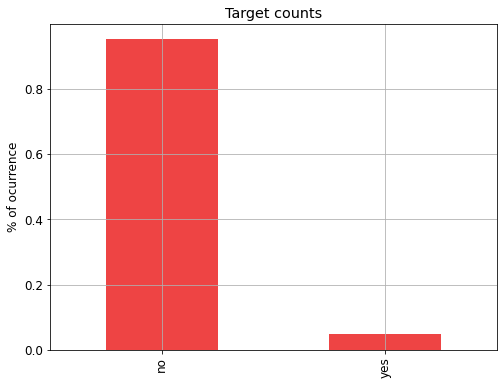

In [9]:
# Calculate the value counts of the target variable
fraudulent_counts = df["fraudulent"].value_counts(normalize=True)

# Plot a bar chart with the obtained values
plt.figure(figsize=(8, 6))
fraudulent_counts.plot(title="Target counts", kind="bar", color="#E44", grid=True, fontsize="12")
plt.ylabel("% of ocurrence")
plt.rcParams["font.size"] = "12"
plt.savefig("plots/target_counts.png", dpi=300)
plt.show()


With this chart it's possible to perceive that there is a big difference in the amount of the occurrences in te target variable. And later, this could affect the results of the perdictive model.


### 5.2. Most fraudulent of `telecommuting`

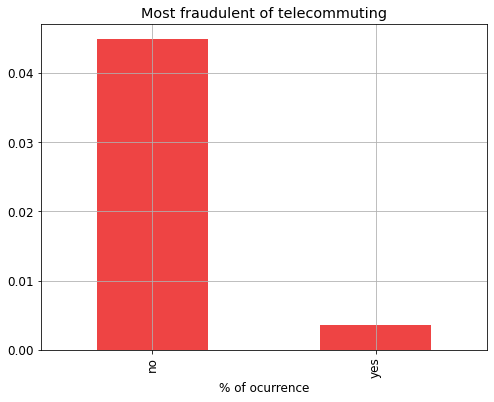

In [10]:
# Calculate the "telecommuting" columns cross table regarding the target variable in a normalized form
telecommuting_cross = pd.crosstab(df["telecommuting"], df["fraudulent"], normalize=True)

# Filters the positive occurences
telecommuting_cross_filtered = telecommuting_cross["yes"]

# Plot a horizontal bar chart with the obtained values
plt.figure(figsize=(8, 6))
telecommuting_cross_filtered.plot(title="Most fraudulent of telecommuting", kind="bar", color="#E44", fontsize="12", grid=True)
plt.xlabel("% of ocurrence")
plt.rcParams["font.size"] = "12"
plt.savefig("plots/most_fraudulent_telecommuting.png", dpi=300)
plt.show()


### 5.3. Most fraudulent of `has_company_logo`

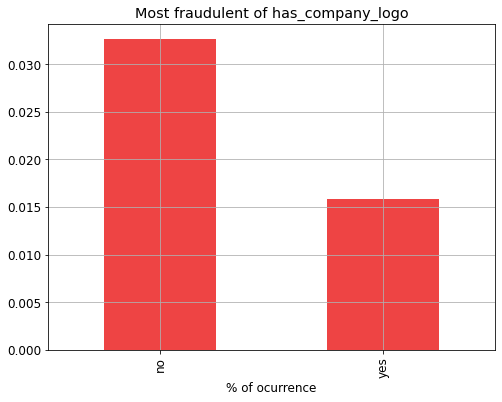

In [11]:
# Calculate the "has_company_logo" columns cross table regarding the target variable in a normalized form
has_company_logo_cross = pd.crosstab(df["has_company_logo"], df["fraudulent"], normalize=True)

# Filters the positive occurences
has_company_logo_cross_filtered = has_company_logo_cross["yes"]

# Plot a horizontal bar chart with the obtained values
plt.figure(figsize=(8, 6))
has_company_logo_cross_filtered.plot(title="Most fraudulent of has_company_logo", kind="bar", color="#E44", fontsize="12", grid=True)
plt.xlabel("% of ocurrence")
plt.rcParams["font.size"] = "12"
plt.savefig("plots/most_fraudulent_company_logos.png", dpi=300)
plt.show()


### 5.4. Most fraudulent of `has_questions`

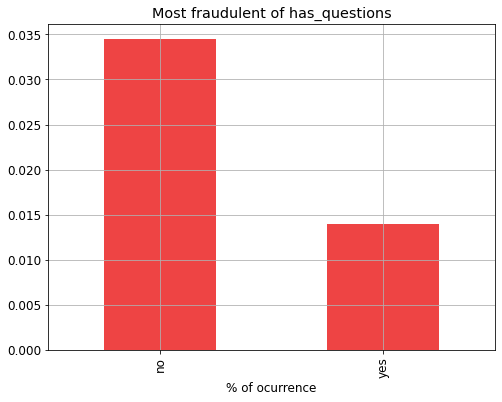

In [12]:
# Calculate the "has_questions" columns cross table regarding the target variable in a normalized form
has_questions_cross = pd.crosstab(df["has_questions"], df["fraudulent"], normalize=True)

# Filters the positive occurences
has_questions_cross_filtered = has_questions_cross["yes"]

# Plot a horizontal bar chart with the obtained values
plt.figure(figsize=(8, 6))
has_questions_cross_filtered.plot(title="Most fraudulent of has_questions", kind="bar", color="#E44", fontsize="12", grid=True)
plt.xlabel("% of ocurrence")
plt.rcParams["font.size"] = "12"
plt.savefig("plots/most_fraudulent_company_logos.png", dpi=300)
plt.show()


### 5.5. Most fraudulent of `departments`

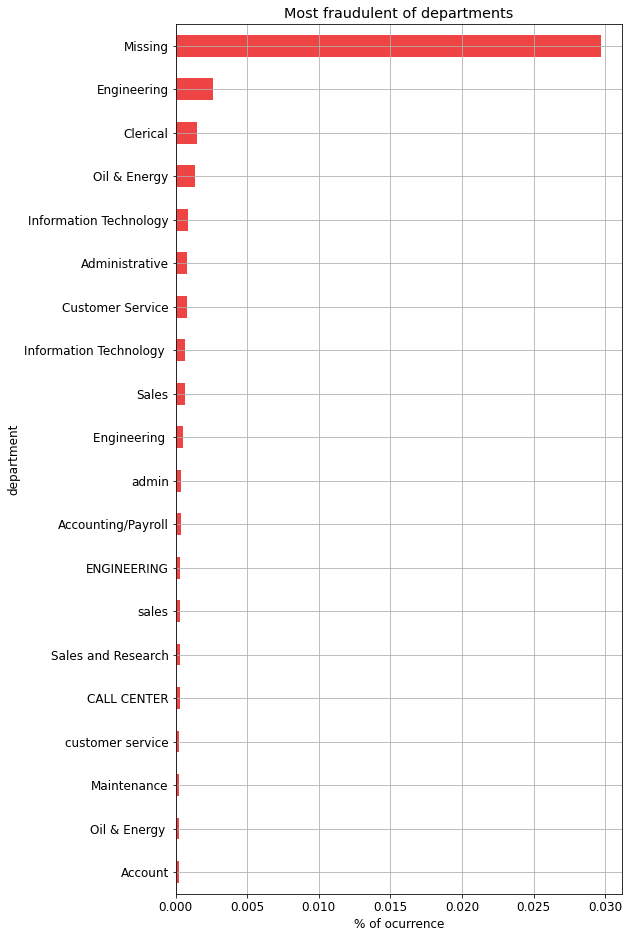

In [13]:
# Calculate the "department" columns cross table regarding the target variable in a normalized form
department_cross = pd.crosstab(df["department"], df["fraudulent"], normalize=True)

# Filters the 20 largest positive occurences in decreasing order
department_cross_filtered = department_cross["yes"].sort_values(ascending=False).iloc[0:20]

# Plot a horizontal bar chart with the obtained values
plt.figure(figsize=(8, 16))
department_cross_filtered.plot(title="Most fraudulent of departments", kind="barh", color="#E44", fontsize="12", grid=True)
plt.xlabel("% of ocurrence")
plt.gca().invert_yaxis()
plt.rcParams["font.size"] = "12"
plt.savefig("plots/most_fraudulent_job_departments.png", dpi=300)
plt.show()


### 5.6. Most fraudulent of `employment_type`

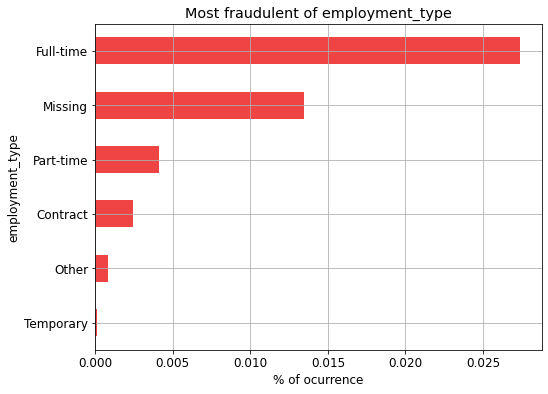

In [14]:
# Calculate the "employment_type" column cross table regarding the target variable in a normalized form
employment_type_cross = pd.crosstab(df["employment_type"], df["fraudulent"], normalize=True)

# Filters the largest positive occurences in decreasing order
employment_type_cross_filtered = employment_type_cross["yes"].sort_values()

# Plot a horizontal bar chart with the obtained values
plt.figure(figsize=(8, 6))
employment_type_cross_filtered.plot(title="Most fraudulent of employment_type", kind="barh", color="#E44", fontsize="12", grid=True)
plt.xlabel("% of ocurrence")
plt.rcParams["font.size"] = "12"
plt.savefig("plots/most_fraudulent_employment_type.png", dpi=300)
plt.show()


### 5.7. Most fraudulent of `required_experience`

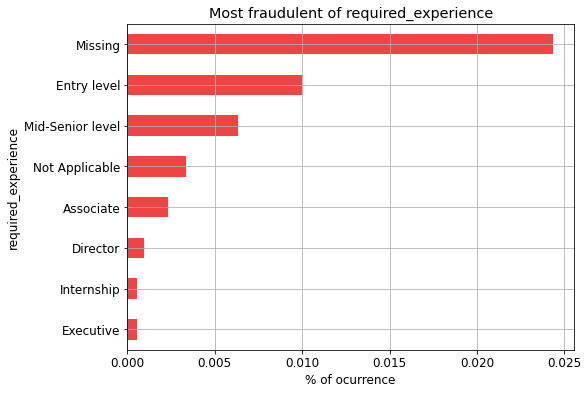

In [15]:
# Calculate the "required_experience" column cross table regarding the target variable in a normalized form
required_experience_cross = pd.crosstab(df["required_experience"], df["fraudulent"], normalize=True)

# Filters the largest positive occurences in decreasing order
required_experience_cross_filtered = required_experience_cross["yes"].sort_values()

# Plot a horizontal bar chart with the obtained values
plt.figure(figsize=(8, 6))
required_experience_cross_filtered.plot(title="Most fraudulent of required_experience", kind="barh", color="#E44", fontsize="12", grid=True)
plt.xlabel("% of ocurrence")
plt.rcParams["font.size"] = "12"
plt.savefig("plots/most_fraudulent_required_experience.png", dpi=300)
plt.show()


### 5.8. Most fraudulent of `required_education`

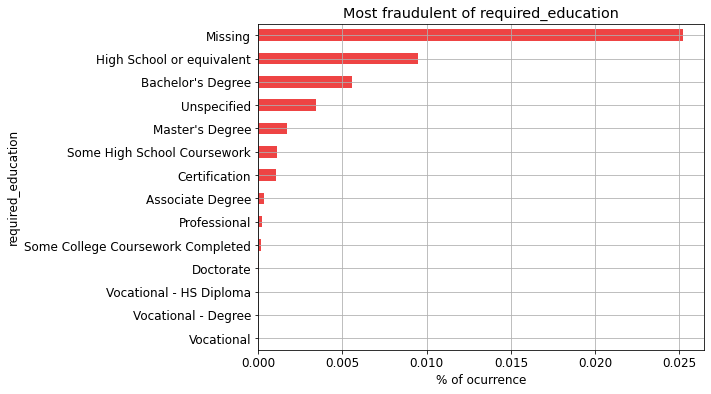

In [16]:
# Calculate the "required_education" column cross table regarding the target variable in a normalized form
required_education_cross = pd.crosstab(df["required_education"], df["fraudulent"], normalize=True)

# Filters the 20 largest positive occurences in decreasing order
required_education_cross_filtered = required_education_cross["yes"].sort_values()

# Plot a horizontal bar chart with the obtained values
plt.figure(figsize=(8, 6))
required_education_cross_filtered.plot(title="Most fraudulent of required_education", kind="barh", color="#E44", fontsize="12", grid=True)
plt.xlabel("% of ocurrence")
plt.rcParams["font.size"] = "12"
plt.savefig("plots/most_fraudulent_required_education.png", dpi=300)
plt.show()


### 5.9. Most fraudulent of `function`

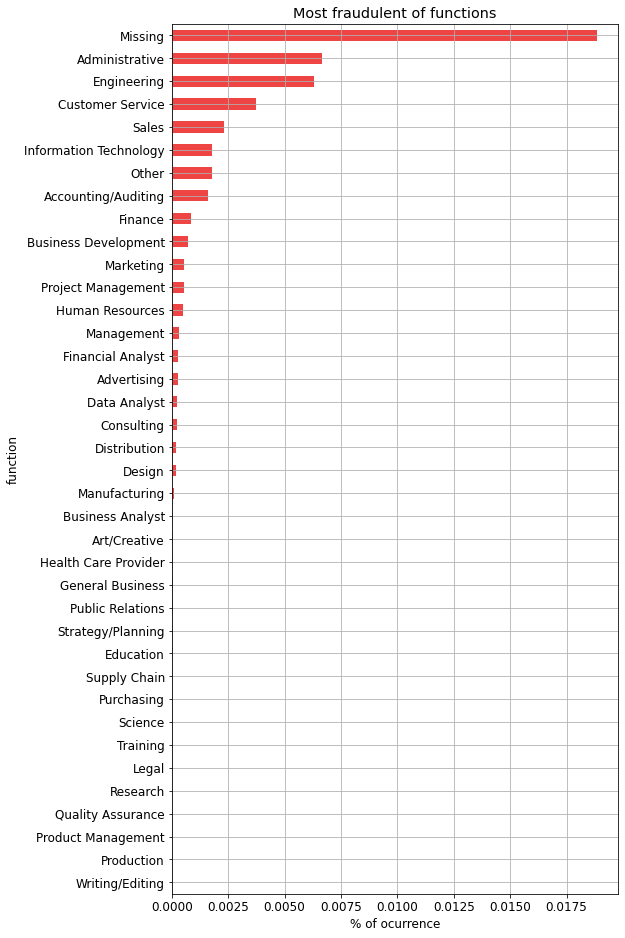

In [17]:
# Calculate the "function" column cross table regarding the target variable in a normalized form
function_cross = pd.crosstab(df["function"], df["fraudulent"], normalize=True)

# Filters the largest positive occurences in decreasing order
function_cross_filtered = function_cross["yes"].sort_values()

# Plot a horizontal bar chart with the obtained values
plt.figure(figsize=(8, 16))
function_cross_filtered.plot(title="Most fraudulent of functions", kind="barh", color="#E44", fontsize="12", grid=True)
plt.xlabel("% of ocurrence")
plt.rcParams["font.size"] = "12"
plt.savefig("plots/most_fraudulent_functions.png", dpi=300)
plt.show()


### 5.10. Most fraudulent of `industries`

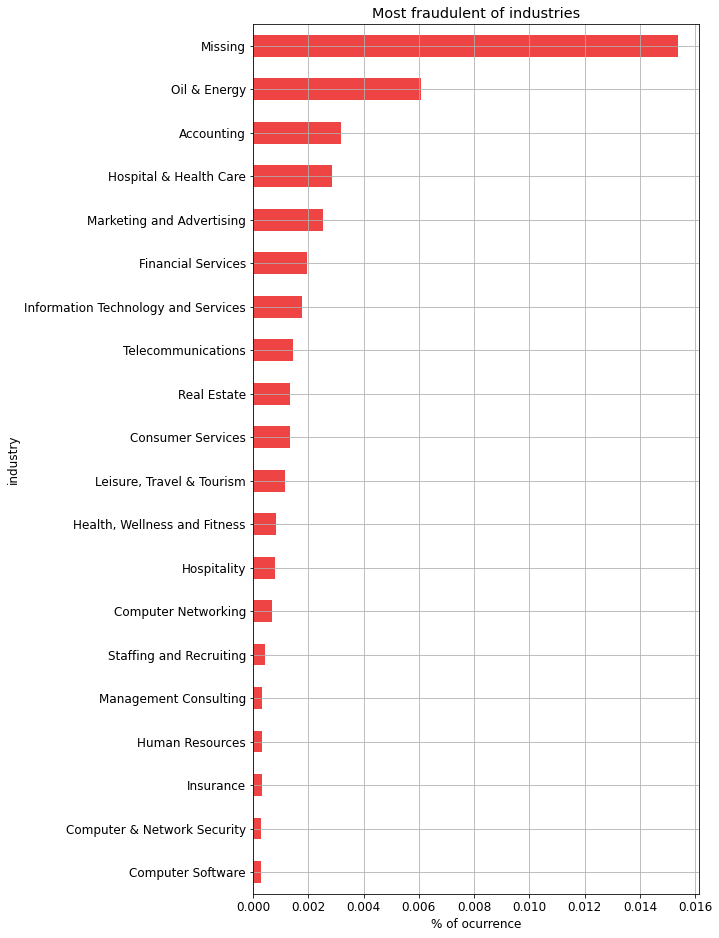

In [18]:
# Calculate the "industry" column cross table regarding the target variable in a normalized form
industry_cross = pd.crosstab(df["industry"], df["fraudulent"], normalize=True)

# Filters the 20 largest positive occurences in decreasing order
industry_cross_filtered = industry_cross["yes"].sort_values(ascending=False).iloc[0:20]

# Plot a horizontal bar chart with the obtained values
plt.figure(figsize=(8, 16))
industry_cross_filtered.plot(title="Most fraudulent of industries", kind="barh", color="#E44", fontsize="12", grid=True)
plt.xlabel("% of ocurrence")
plt.gca().invert_yaxis()
plt.rcParams["font.size"] = "12"
plt.savefig("plots/most_fraudulent_industries.png", dpi=300)
plt.show()

## 6. Conclusion

With the analysis done, it is possible to determine the type of variable face of interest for each column, to later define transformations in these values to build the predictive model.

| **Column**              | **Type** |
|:------------------------|:---------|
| **title**               | Text     |
| **department**          | Category |
| **company_profile**     | Text     |
| **description**         | Text     |
| **requirements**        | Text     |
| **benefits**            | Text     |
| **telecommuting**       | Boolean  |
| **has_company_logo**    | Boolean  |
| **has_questions**       | Boolean  |
| **employment_type**     | Category |
| **required_experience** | Category |
| **required_education**  | Category |
| **industry**            | Text     |
| **function**            | Text     | 
